In [8]:
import pandas as pd
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression

In [9]:
df = pd.read_csv('heart.csv')

In [10]:
df.head()
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [12]:
col_names=['age','sex','cp','treastbps','chol','fbs','restecg','thalach',
           'exang','oldpeak','slope','ca','thal','target']
array=df.values
print(array)

x=array[:,0:13]
y=array[:,13]


kfold=model_selection.KFold(n_splits=10,random_state=7,shuffle=True)
model=LogisticRegression(solver='liblinear')
scoring='recall'
results=model_selection.cross_val_score(model,x,y,cv=kfold,scoring=scoring)

print("recall is : %.3f (%.3f)" % (results.mean(),results.std()))


[[63.  1.  3. ...  0.  1.  1.]
 [37.  1.  2. ...  0.  2.  1.]
 [41.  0.  1. ...  0.  2.  1.]
 ...
 [68.  1.  0. ...  2.  3.  0.]
 [57.  1.  0. ...  1.  3.  0.]
 [57.  0.  1. ...  1.  2.  0.]]
recall is : 0.890 (0.076)


In [13]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import svm

X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=109)

clf = svm.SVC(kernel='linear') #linear kernel

clf.fit(X_train,y_train)

y_prediction=clf.predict(X_test)


scoring='recall'
results=model_selection.cross_val_score(clf,x,y,cv=kfold,scoring=scoring)
print("recall is : %.3f (%.3f)" % (results.mean(),results.std()))

recall is : 0.894 (0.091)


In [14]:
scoring='precision'
results=model_selection.cross_val_score(clf,x,y,cv=kfold,scoring=scoring)
print("precision is : %.3f (%.3f)" % (results.mean(),results.std()))

precision is : 0.818 (0.134)


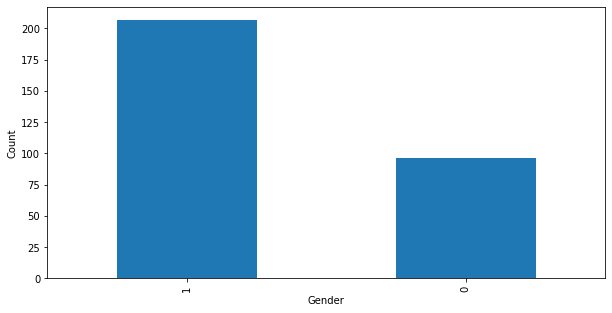

In [34]:
series = df["sex"].value_counts()
fig = plt.figure(figsize = (10, 5))
series.plot(kind='bar')

plt.xlabel("Gender")
plt.ylabel("Count")

plt.show()

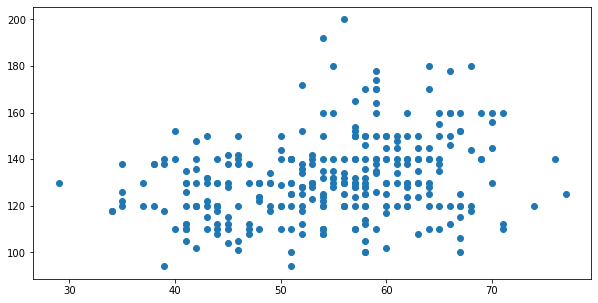

In [36]:
ex=df['age']
ey=df['trestbps']
fig = plt.figure(figsize = (10, 5))
plt.scatter(ex,ey)
plt.show()